## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [6]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import EarlyStopping

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [28]:

def build_mlp(n_unit = [128, 64 , 64], o_unit = 10, i_shape= ''):
    input_layer = keras.layers.Input(shape=i_shape)

    for i, n in enumerate(n_unit):
        if i == 0:
            x = keras.layers.Dense(units=n, activation='relu')(input_layer)
        else:
            x = keras.layers.Dense(units=n, activation='relu')(x)
            
    out_layer = keras.layers.Dense(units = o_unit, activation='softmax')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out_layer])

    return model

In [52]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
# MOMENTUM = 0.95
patience = [10, 20, 30]

In [55]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for p in patience:
    model = build_mlp(i_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    earlystop = EarlyStopping(monitor='val_accuracy', patience = p)


    model.fit(x_train,
              y_train,
              batch_size=BATCH_SIZE, 
              validation_data = (x_test, y_test),
              callbacks = [earlystop],
              epochs=EPOCHS)
    tag = f'early_stop_with_patience_{p}'
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    results[tag] = dict(train_loss=train_loss, valid_loss=valid_loss, train_acc=train_acc, valid_acc=valid_acc)

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_34 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_35 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_36 (Dense)             (None, 10)                650       
Total params: 406,410
Trainable params: 406,410
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 121us/st

C:\Users\USER\Anaconda3\envs\tf_2\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 4s 87us/step - loss: 1.7459 - accuracy: 0.3761 - val_loss: 1.6950 - val_accuracy: 0.3952
Epoch 3/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.6608 - accuracy: 0.4066 - val_loss: 1.6405 - val_accuracy: 0.4150
Epoch 4/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.6009 - accuracy: 0.4282 - val_loss: 1.5694 - val_accuracy: 0.4414
Epoch 5/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.5611 - accuracy: 0.4421 - val_loss: 1.5267 - val_accuracy: 0.4589
Epoch 6/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.5257 - accuracy: 0.4578 - val_loss: 1.5165 - val_accuracy: 0.4608
Epoch 7/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.4948 - accuracy: 0.4662 - val_loss: 1.5249 - val_accuracy: 0.4548
Epoch 8/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.4729 - accuracy: 0.4761 - val_loss: 1.4772 - val

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.9428 - accuracy: 0.2957 - val_loss: 1.7939 - val_accuracy: 0.3651
Epoch 2/50
 1792/50000 [>.............................] - ETA: 3s - loss: 1.7960 - accuracy: 0.3683

C:\Users\USER\Anaconda3\envs\tf_2\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 5s 101us/step - loss: 1.7535 - accuracy: 0.3761 - val_loss: 1.7221 - val_accuracy: 0.3876
Epoch 3/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.6787 - accuracy: 0.4025 - val_loss: 1.6598 - val_accuracy: 0.4067
Epoch 4/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.6208 - accuracy: 0.4231 - val_loss: 1.6989 - val_accuracy: 0.3982
Epoch 5/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.5785 - accuracy: 0.4396 - val_loss: 1.5621 - val_accuracy: 0.4410
Epoch 6/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.5439 - accuracy: 0.4515 - val_loss: 1.5479 - val_accuracy: 0.4458
Epoch 7/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.5166 - accuracy: 0.4626 - val_loss: 1.5166 - val_accuracy: 0.4628
Epoch 8/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.4940 - accuracy: 0.4701 - val_loss: 1.5211 -

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.9384 - accuracy: 0.2958 - val_loss: 1.8013 - val_accuracy: 0.3567
Epoch 2/50
 1792/50000 [>.............................] - ETA: 3s - loss: 1.8037 - accuracy: 0.3477

C:\Users\USER\Anaconda3\envs\tf_2\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 4s 85us/step - loss: 1.7536 - accuracy: 0.3707 - val_loss: 1.7214 - val_accuracy: 0.3769
Epoch 3/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.6711 - accuracy: 0.4026 - val_loss: 1.6704 - val_accuracy: 0.4019
Epoch 4/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.6231 - accuracy: 0.4196 - val_loss: 1.6029 - val_accuracy: 0.4270
Epoch 5/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.5735 - accuracy: 0.4400 - val_loss: 1.5842 - val_accuracy: 0.4423
Epoch 6/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.5469 - accuracy: 0.4489 - val_loss: 1.5533 - val_accuracy: 0.4469
Epoch 7/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.5097 - accuracy: 0.4628 - val_loss: 1.5814 - val_accuracy: 0.4490
Epoch 8/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.4842 - accuracy: 0.4727 - val_loss: 1.4924 - va

0 early_stop_with_patience_10
1 early_stop_with_patience_20
2 early_stop_with_patience_30


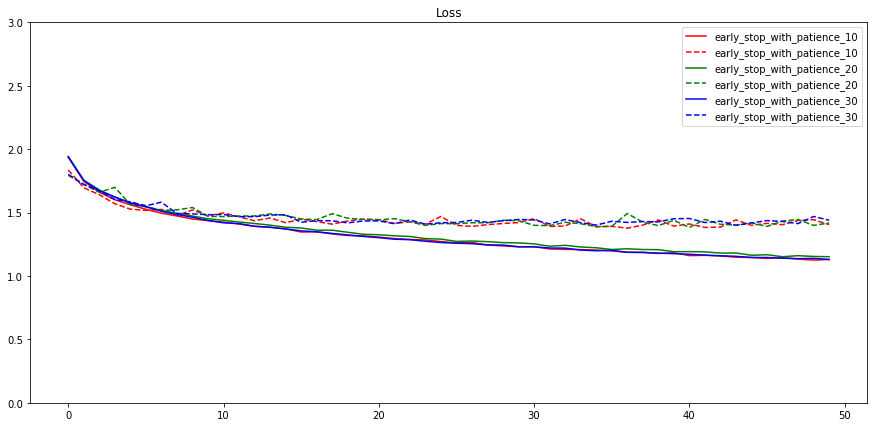

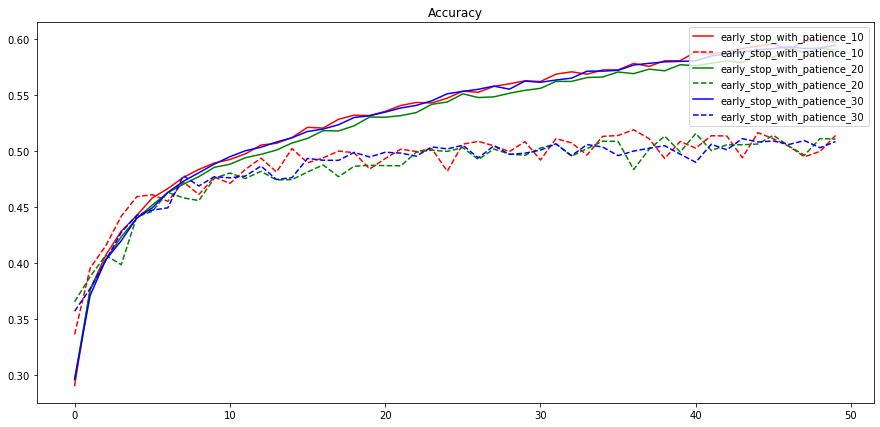

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "c", "y", "m", "k", "tab:brown", "tab:orange"]

plt.figure(figsize=(15,7))
for i, cond in enumerate(results.keys()):
    print(i, cond)
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 3])
plt.legend(loc=1)
plt.show()

plt.figure(figsize=(15,7))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc=1)
plt.show()

In [57]:
results

{'early_stop_with_patience_10': {'train_loss': [1.9374609463882446,
   1.745865512161255,
   1.6608224724960328,
   1.6009191017913817,
   1.5610676009750366,
   1.5256662020111085,
   1.4948275891876222,
   1.4729346803665162,
   1.449383103981018,
   1.4361784867095948,
   1.4244342107391357,
   1.4090573988342285,
   1.3913087659454346,
   1.3840978423690795,
   1.3714783795928955,
   1.3465329523468017,
   1.3477874599456787,
   1.3312594239044189,
   1.3190370846176147,
   1.316123789100647,
   1.3069640475845337,
   1.2949007842254638,
   1.2879151497268677,
   1.2838409703826905,
   1.271231373977661,
   1.2610114954376221,
   1.2638771692657471,
   1.2440522914505006,
   1.2367431967926026,
   1.230401475791931,
   1.230702050895691,
   1.212959510345459,
   1.2096491063308716,
   1.2080221506500244,
   1.2040278592300415,
   1.1981793632888793,
   1.1866939408111572,
   1.1872608248901366,
   1.177497163772583,
   1.1830965825653077,
   1.1605931351470948,
   1.162703956069946